In [94]:
from sklearn import ensemble
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [123]:
RFC = ensemble.RandomForestClassifier(n_estimators=100,
                                      max_depth=7,
                                      criterion='entropy',
                                      max_features=5,
                                      bootstrap=True,
                                      n_jobs=-1
                                     )
data = pd.read_csv('Downloads/credit_scoring_sample.csv')
filtered_data = data[data["NumberOfTime30-59DaysPastDueNotWorse"] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTime60-89DaysPastDueNotWorse'] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTimes90DaysLate'] < 90]
filtered_data = filtered_data[filtered_data['DebtRatio'] < 10000]
filtered_data = filtered_data[filtered_data['MonthlyIncome'] < 100000]
X = filtered_data.fillna(data.median())
y = X.pop('SeriousDlqin2yrs')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=30000)

In [126]:
filtered_data.head(10)

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0
5,0,55,0,0.324678,0,0,8934.0,0.0
6,0,25,0,0.473421,0,0,2200.0,0.0
7,1,31,0,0.017415,0,0,4076.0,0.0
8,1,37,2,0.233710,0,0,7166.0,0.0
9,0,55,0,0.420954,0,0,3750.0,0.0
10,1,53,10,0.331620,3,1,3500.0,0.0


In [87]:
%%time
RFC.fit(X_train, y_train)

Wall time: 5.41 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [88]:
print('train score={}, test score={}'.format(RFC.score(X_train, y_train), RFC.score(X_test, y_test)))

train score=0.8420333333333333, test score=0.8315338202604001


In [89]:
pred = RFC.predict_proba(X_test)[:, 1]
pred

array([0.24039939, 0.03624283, 0.16408226, ..., 0.1465562 , 0.0878069 ,
       0.49552357])

In [90]:
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

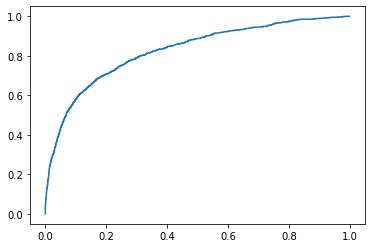

In [91]:
plt.plot(fpr, tpr)

In [92]:
auc

0.8263966868306347

In [93]:
tree = RFC.estimators_[5]

In [145]:
dot = export_graphviz(
    tree,
    rotate=True,
    proportion=True,
    class_names=['0', '1'],
    out_file='tree.dot',
    feature_names=X.columns,
    filled=True,
    max_depth=4,
    rounded=True
)